# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [11]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import the model and preferences
import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass as HSMC
from Question_5 import HouseholdSpecializationModelClass as q5

model = HSMC()
q5 = q5()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

/Users/macbookair2018/OneDrive - University of Copenhagen/Uni dokumenter/Kandidaten/8. Semester/Introduction to Programming and Numerical Analysis/projects-2023-leif/inauguralproject/inauguralproject.py:77: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**(s_power)+par.alpha*HF**(s_power))**(1/s_power)
/Users/macbookair2018/OneDrive - University of Copenhagen/Uni dokumenter/Kandidaten/8. Semester/Introduction to Programming and Numerical Analysis/projects-2023-leif/inauguralproject/inauguralproject.py:77: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**(s_power)+par.alpha*HF**(s_power))**(1/s_power)
/Users/macbookair2018/OneDrive - University of Copenhagen/Uni dokumenter/Kandidaten/8. Semester/Introduction to Programming and Numerical Analysis/projects-2023-leif/inauguralproject/inauguralproject.py:88: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(r_power)/(r_power)


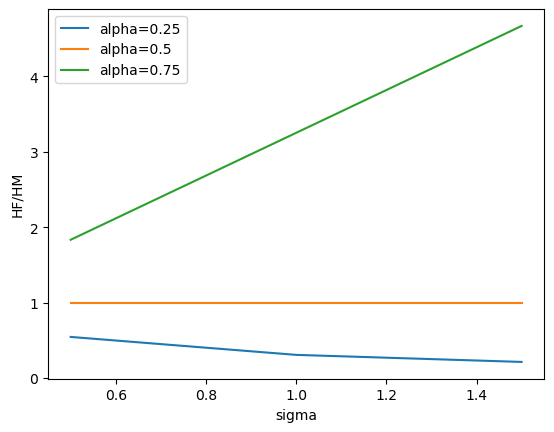

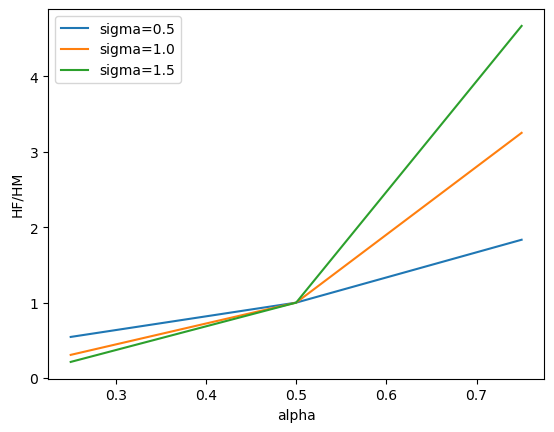

In [3]:


# define values of alpha and sigma to loop through
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# initialize dictionary to store results
resultsHF = {}
resultsHM = {}

# loop through all combinations of alpha and sigma
for alpha in alpha_values:
    for sigma in sigma_values:
        # set values of alpha and sigma in the model
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve the model and store the result
        opt = model.solve_discrete()
        resultsHF[(alpha, sigma)] = opt.HF
        resultsHM[(alpha, sigma)] = opt.HM

# plot the results
fig, ax = plt.subplots()
for alpha in alpha_values:
    y = [resultsHF[(alpha, sigma)]/resultsHM[(alpha,sigma)] for sigma in sigma_values]
    ax.plot(sigma_values, y, label=f"alpha={alpha}")
ax.set_xlabel("sigma")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()

fig, ax = plt.subplots()
for sigma in sigma_values:
    y = [resultsHF[(alpha, sigma)]/resultsHM[(alpha,sigma)] for alpha in alpha_values]
    ax.plot(alpha_values, y, label=f"sigma={sigma}")
ax.set_xlabel("alpha")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()


# Question 2

Explain your code and procedure

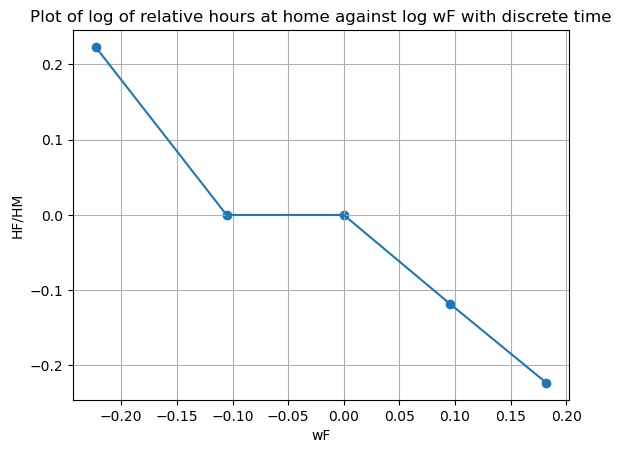

{0.8: 5.0, 0.9: 4.5, 1.0: 4.5, 1.1: 4.0, 1.2: 4.0}
{0.8: 4.0, 0.9: 4.5, 1.0: 4.5, 1.1: 4.5, 1.2: 5.0}


In [4]:
# create instance of the model
model2 = HSMC()

# define values of alpha and sigma to loop through
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]


# initialize dictionary to store results
resultsHF = {}
resultsHM = {}

for wF in wF_values:
    # set values of alpha and sigma in the model
    model2.par.wF = wF
        
    # solve the model and store the result
    opt = model2.solve_discrete()
    resultsHF[wF] = opt.HF
    resultsHM[wF] = opt.HM

# plot the results
fig, ax = plt.subplots()
for wf in wF_values:
    y = [np.log(resultsHF[wF]/resultsHM[wF]) for wF in wF_values]
ax.plot(np.log(wF_values),y)
ax.scatter(np.log(wF_values),y)
ax.grid(True)
ax.set_xlabel("wF")
ax.set_ylabel("HF/HM")
ax.set_title("Plot of log of relative hours at home against log wF with discrete time")
plt.show()

print(resultsHF)
print(resultsHM)



Når den relative løn for kvinder falder, vil de bruge mere tid hjemmet.

# Question 3

Instead of doing a discrete analysis providng a linear interval we now optimize in each periode to the optimal values for doing work at home for each wage.

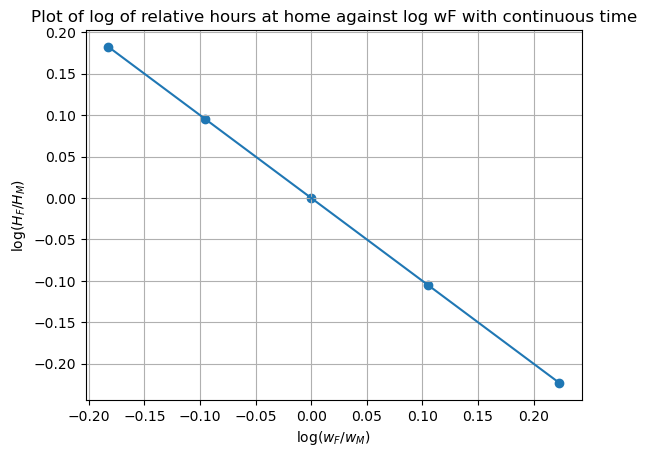

In [6]:
model3 = HSMC()

model3.solve_wF_vec()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(np.log(model3.sol.HF_vec / model3.sol.HM_vec), np.log(model3.par.wF_vec))
ax.grid(True)
ax.scatter(np.log(model3.sol.HF_vec / model3.sol.HM_vec), np.log(model3.par.wF_vec))
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log wF with continuous time")
plt.show()


When going from discrete to continuous timeframe we get a more smooth line when chaning the relative wage.

## Question 4

In [7]:
# Printing the result of our regression

model.estimate(do_print=True)


α_opt = 0.9820137441
σ_opt = 0.1000000610
Residual_opt = 0.000000


The optimal $\alpha$ and $\sigma$ is therefore $\alpha_O = 0.982$ and $\sigma_O = 0.100$

Comparing results to the article from Siminski and Yetsenga (2022). Starting by generating a plot for their results.

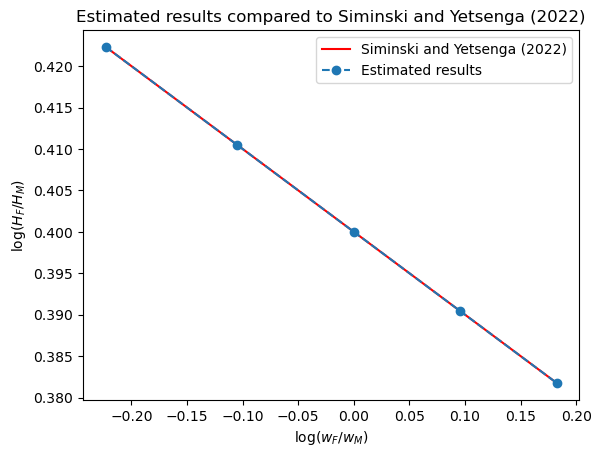

In [8]:
model.solve_wF_vec()

log_ratio_continuous = np.log(model.sol.HF_vec / model.sol.HM_vec)
log_wF = np.log(model.par.wF_vec)

x = np.log(np.linspace(0.8,1.2,2))
y = model.par.beta0_target + model.par.beta1_target*x

plt.plot(x, y, color = "red", linestyle = "-", label = "Siminski and Yetsenga (2022)")
plt.plot(log_wF, log_ratio_continuous, marker = "o", linestyle = "--", label = "Estimated results")
plt.legend(loc="upper right")
plt.title("Estimated results compared to Siminski and Yetsenga (2022)")
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
plt.show()

# Question 5

The extention to the model we propose is defining a variable $\kappa$ that is included in the utility function. We include this variable to achieve higher disutility for men when working home compared to women. By including this variable in our utility function the function will look like this:
$$\frac{Q^{1-\rho}}{1-\rho}-v\Bigg(\frac{T_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{T_F^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\Bigg)-\kappa H_M, \rho>1, v>0, \epsilon>0, \kappa>0$$
We need $\kappa$ to be bigger than 0, as seen in the utility function as this will affect how much men work at home. 

The code for this question will be similar in structure to the last one but instead of opimtizing over $\alpha$ we will now optimize over $\kappa$. 

In [14]:
# We're setting initial values first
target_best_5 = 10**6
sigma_best_5 = np.nan
kappa_best_5 = np.nan

beta0_best_5 = 0
beta1_best_5 = 1

# we're trying the loop with different values as we do not want to get a local minimum. 
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 1000]:
    sigma,kappa,target=q5.estimate(i)
    if target<target_best_5:
        target_best_5=target
        sigma_best_5=sigma
        kappa_best_5=kappa
        log_HF_HM_best_5 = q5.solve_wF_vec()

/Users/macbookair2018/OneDrive - University of Copenhagen/Uni dokumenter/Kandidaten/8. Semester/Introduction to Programming and Numerical Analysis/projects-2023-leif/inauguralproject/Question_5.py:68: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**(s_power)+par.alpha*HF**(s_power))**(1/s_power)


In [16]:
# We're then calculating the estimated value of beta0 and beta1 for the optimal values of alpha and sigma
beta0_best_5, beta1_best_5 = q5.run_regression(sigma_best_5, kappa_best_5)

# We're then printing the results
print(f"Sigma's optimal value is: {sigma_best_5: .3f}")
print(f"Kappa's optimal value is: {kappa_best_5: .3f}")
print(f"Beta0's estimated value is: {beta0_best_5: .3f}")
print(f"Beta1's estimated value is: {beta1_best_5: .3f}")
print(f"Target function value: {target_best_5: .5f}")

# We finally resture the original values
q5.par.sigma=1
q5.par.kappa=0.5

Sigma's optimal value is:  0.195
Kappa's optimal value is:  0.056
Beta0's estimated value is:  0.400
Beta1's estimated value is: -0.100
Target function value:  0.00000


Text(0, 0.5, '$\\log(H_F/H_M)$')

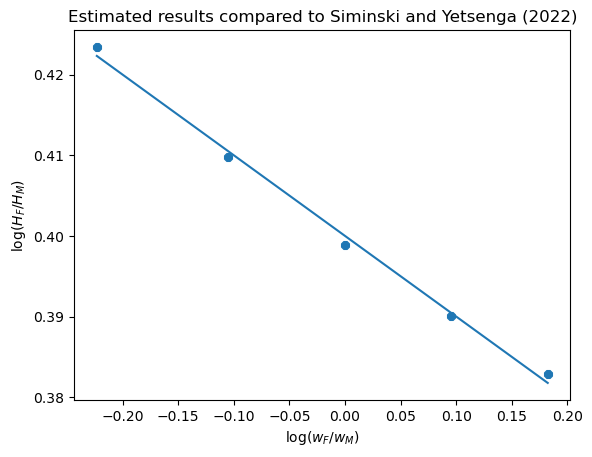

In [19]:
# We will lastly create a figure to see the fit of the data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec),model.par.beta0_target+model.par.beta1_target*np.log(model.par.wF_vec),label="Siminiski and Yetsenga (2022)")
ax.scatter(np.log(model.par.wF_vec), log_HF_HM_best_5,marker ="8", label="New estimation")
ax.legend
ax.set_title("Estimated results compared to Siminski and Yetsenga (2022)")
ax.set_xlabel('$\log(w_F / w_M)$')
ax.set_ylabel("$\log(H_F/H_M)$")


The new estimated model almost fit the data that we've used earlier. The model, giving men extra disutility form working frome home, makes it possible to match the result from the paper even though women and men have the same productivity at home. There are many factors that can attribute to extra disutility from working from home for men, which could be underlying structures in homes and the workplace. 